In [14]:
# 1. Load & Prepare Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_excel("Response.xlsx")
df.columns = [col.strip() for col in df.columns]
print("executed")

executed


In [15]:
# Rename and map categorical columns

#loading the dataset and renaming columns

df = df.rename(columns={
    'What is your gender?': 'Gender',
    'What is your age?': 'Age',
    'What is your Monthly Household Income?': 'Income'
})

df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})

df['Age'] = df['Age'].map({
    1: '24-30',
    2: '31-37',
    3: '38-44',
    4: '45+'
})

df['Income'] = df['Income'].map({
    1: 'Less than 5 Lakhs',
    2: '5 Lakhs-10 Lakhs',
    3: '10 Lakhs-15 Lakhs',
    4: '15 Lakhs and Above'
})


df = df.rename(columns={
    'K1': 'K1_Know_EV',
    'K2': 'K2_Gov_Subsidy',
    'K3': 'K3_EV_vs_Petrol',
    'K4': 'K4_Know_Charging',
    'K5': 'K5_Maintenance',
    
    'ATT1': 'A1_Env_Concern',
    'ATT2': 'A2_Cost_Effective',
    'ATT3': 'A3_Trust_EVs',
    'ATT4': 'A4_Style_Image',
    'ATT5': 'A5_Resale_Value',
    
    'P1': 'P1_Own_EV',
    'P2': 'P2_Buy_Next',
    'P3': 'P3_Recommend_EV',
    'P4': 'P4_Use_Daily',
    'P5': 'P5_Charge_Habit'
})


print(df.head())

   Gender    Age             Income  K1_Know_EV  K2_Gov_Subsidy  \
0    Male  24-30  Less than 5 Lakhs           1               1   
1  Female  31-37   5 Lakhs-10 Lakhs           2               2   
2    Male  38-44  10 Lakhs-15 Lakhs           1               1   
3    Male    45+  Less than 5 Lakhs           2               2   
4  Female  24-30   5 Lakhs-10 Lakhs           3               3   

   K3_EV_vs_Petrol  K4_Know_Charging  K5_Maintenance  A1_Env_Concern  \
0                1                 1               1               1   
1                2                 2               2               2   
2                1                 1               1               1   
3                2                 2               2               2   
4                3                 3               3               3   

   A2_Cost_Effective  A3_Trust_EVs  A4_Style_Image  A5_Resale_Value  \
0                  1             1               1                1   
1                  2  

In [16]:
kap_columns = [
    'K1_Know_EV', 'K2_Gov_Subsidy', 'K3_EV_vs_Petrol',
    'K4_Know_Charging', 'K5_Maintenance',
    'A1_Env_Concern', 'A2_Cost_Effective', 'A3_Trust_EVs',
    'A4_Style_Image', 'A5_Resale_Value',
    'P1_Own_EV', 'P2_Buy_Next', 'P3_Recommend_EV',
    'P4_Use_Daily', 'P5_Charge_Habit'
]

# Drop rows with missing KAP values
kap_data = df[kap_columns].dropna()
print("null value columns are dropped")

null value columns are dropped


In [18]:
# Standardize KAP data
scaler = StandardScaler()
kap_scaled = scaler.fit_transform(kap_data)
print("data standardized")

data standardized


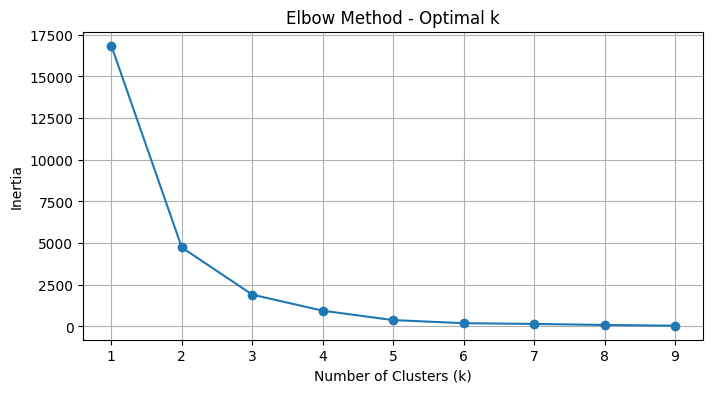

In [19]:
# elbow method to fing optimal k

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kap_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [21]:
# Apply KMeans Cluatering (assume K=3 based on elbow)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clustered = df.loc[kap_data.index].copy()
df_clustered["Cluster"] = kmeans.fit_predict(kap_scaled)
print("clusters=3")

clusters=3


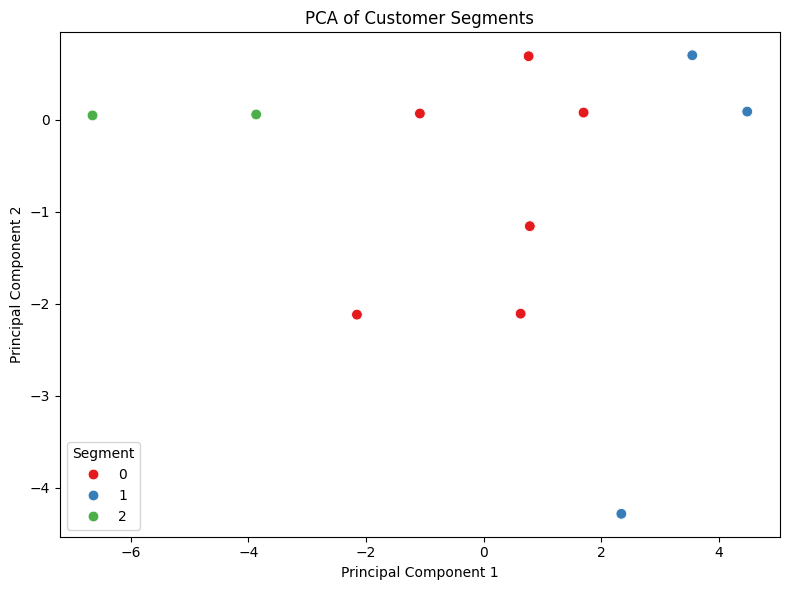

In [22]:
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
kap_scaled = StandardScaler().fit_transform(df_clustered[kap_columns])  # just in case not scaled
kap_2d = pca.fit_transform(kap_scaled)

pca_df = pd.DataFrame(kap_2d, columns=["PC1", "PC2"])
pca_df["Cluster"] = df_clustered["Cluster"].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=60)
plt.title("PCA of Customer Segments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


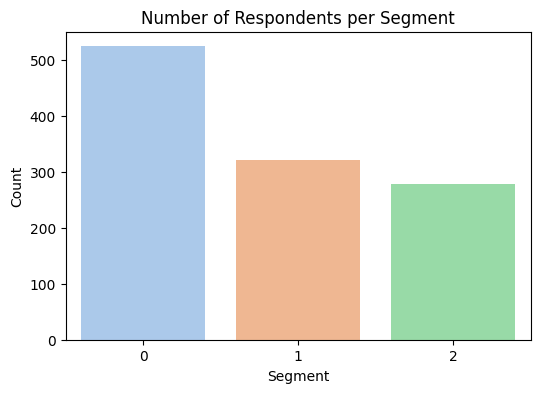

In [23]:
# Plot the count of respondents in each segment
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clustered, x="Cluster", hue="Cluster", palette="pastel", legend=False)
plt.title("Number of Respondents per Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()


         K1_Know_EV  K2_Gov_Subsidy  K3_EV_vs_Petrol  K4_Know_Charging  \
Cluster                                                                  
0              3.51            3.51             3.51              3.51   
1              4.98            4.98             4.98              4.98   
2              1.38            1.38             1.38              1.38   

         K5_Maintenance  A1_Env_Concern  A2_Cost_Effective  A3_Trust_EVs  \
Cluster                                                                    
0                  3.51            3.50               3.50          3.50   
1                  4.98            5.00               5.00          5.00   
2                  1.38            1.38               1.38          1.38   

         A4_Style_Image  A5_Resale_Value  P1_Own_EV  P2_Buy_Next  \
Cluster                                                            
0                  3.50             3.50       3.50         3.50   
1                  5.00             5.00    

Cluster  Gender
0        Female    330
         Male      194
1        Female    195
         Male      126
2        Female    168
         Male      110
Name: count, dtype: int64


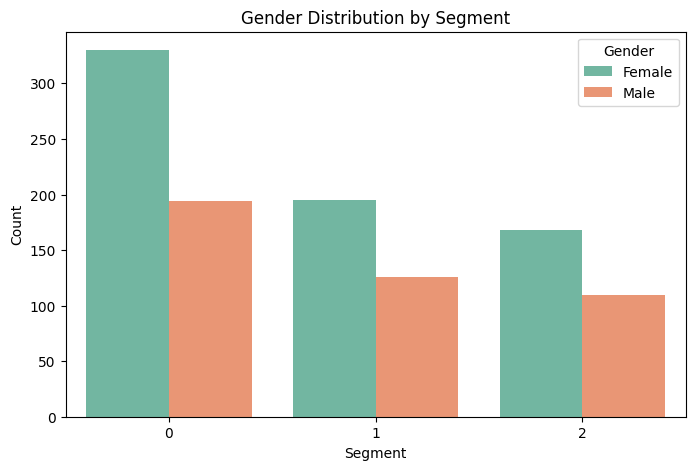

In [34]:
#Gender By Segment
print(df_clustered.groupby('Cluster')['Gender'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clustered, x="Cluster", hue="Gender", palette="Set2")
plt.title("Gender Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

Cluster  Age  
0        24-30    141
         31-37    133
         38-44    131
         45+      119
1        31-37     96
         24-30     91
         38-44     76
         45+       58
2        31-37     75
         24-30     71
         38-44     71
         45+       61
Name: count, dtype: int64


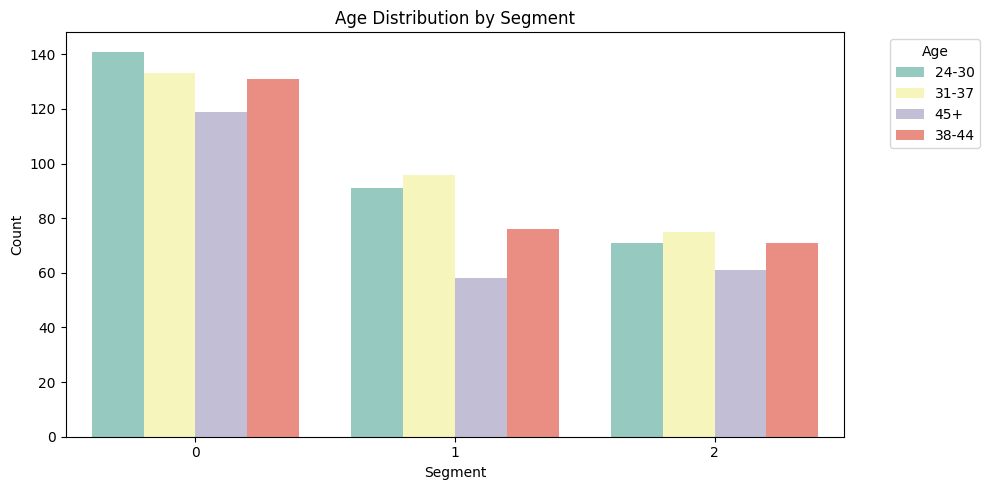

In [30]:
#Age By Segment
print(df_clustered.groupby('Cluster')['Age'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered, x="Cluster", hue="Age", palette="Set3")
plt.title("Age Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Cluster  Income            
0        Less than 5 Lakhs     151
         5 Lakhs-10 Lakhs      139
         10 Lakhs-15 Lakhs     123
         15 Lakhs and Above    111
1        5 Lakhs-10 Lakhs       91
         10 Lakhs-15 Lakhs      84
         Less than 5 Lakhs      78
         15 Lakhs and Above     68
2        10 Lakhs-15 Lakhs      72
         Less than 5 Lakhs      71
         5 Lakhs-10 Lakhs       68
         15 Lakhs and Above     67
Name: count, dtype: int64


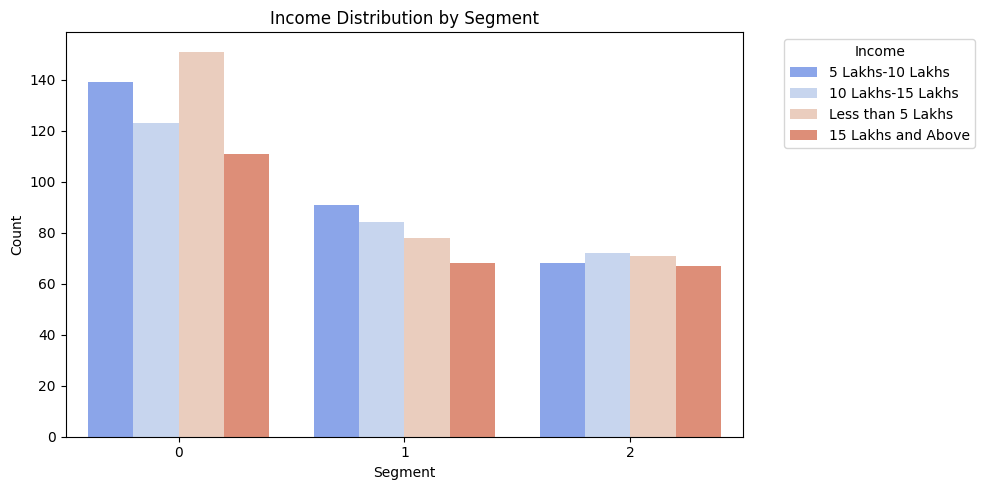

In [35]:

print(df_clustered.groupby('Cluster')['Income'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered, x="Cluster", hue="Income", palette="coolwarm")
plt.title("Income Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:

print(df_clustered.groupby('Cluster')[kap_columns].mean().round(2)) #average responses to KAP indicators per cluster
print(df_clustered.groupby('Cluster')[['Gender', 'Age', 'Income']].value_counts().unstack().fillna(0))  # each cluster composition demographically


         K1_Know_EV  K2_Gov_Subsidy  K3_EV_vs_Petrol  K4_Know_Charging  \
Cluster                                                                  
0              3.51            3.51             3.51              3.51   
1              4.98            4.98             4.98              4.98   
2              1.38            1.38             1.38              1.38   

         K5_Maintenance  A1_Env_Concern  A2_Cost_Effective  A3_Trust_EVs  \
Cluster                                                                    
0                  3.51            3.50               3.50          3.50   
1                  4.98            5.00               5.00          5.00   
2                  1.38            1.38               1.38          1.38   

         A4_Style_Image  A5_Resale_Value  P1_Own_EV  P2_Buy_Next  \
Cluster                                                            
0                  3.50             3.50       3.50         3.50   
1                  5.00             5.00    

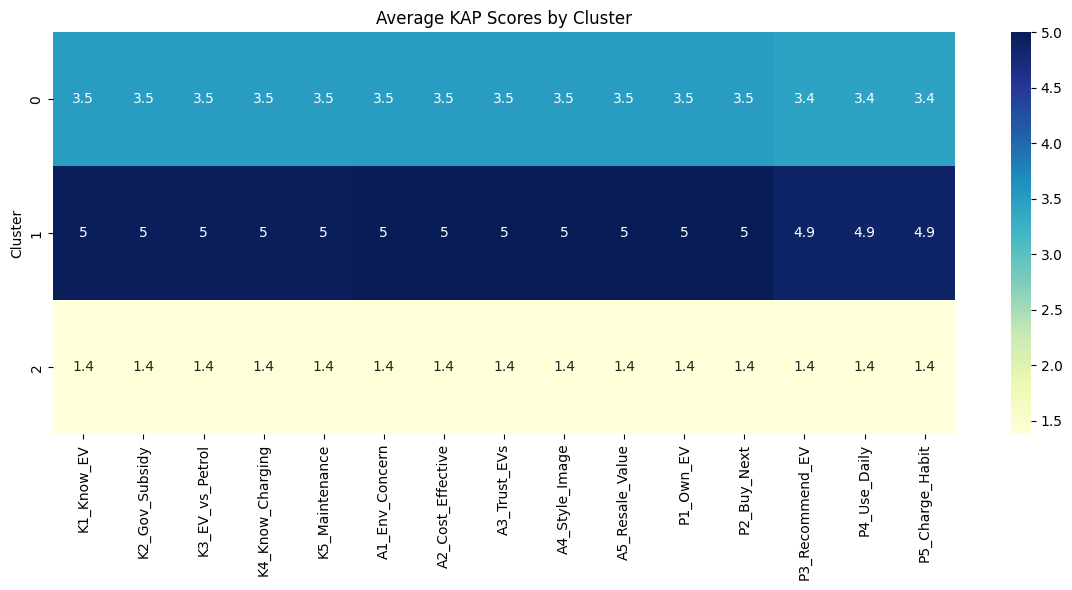

In [33]:

# visualize KAP Scores by Cluster with heatmap
cluster_profiles = df_clustered.groupby('Cluster')[kap_columns].mean().round(2)
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles, annot=True, cmap='YlGnBu')
plt.title("Average KAP Scores by Cluster")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# Based on K-Means clustering and KAP analysis, three distinct customer segments emerged. Segment 1, with the highest KAP scores and moderate-to-high income, represents the most promising early adopters. Marketing efforts should focus on this group through offers and incentives. Segment 0 should be nurtured with awareness campaigns. Segment 2 shows minimal interest and will not be a focus in the near term.